# Homework 3 PCA VS SVD

**Giorgia delle Grazie, s300879**

**Computational Linear Algebra for Large Scale Problems, Politecnico di Torino**

In the fields of machine learning and data analysis, dimensionality reduction is a fundamental technique for managing data complexity and improving model performance. Two widely used methods for dimensionality reduction are Principal Component Analysis (PCA) and Singular Value Decomposition (SVD). In this project, we will explore and compare the effectiveness of these two approaches based on the Fashion MNIST dataset.

**Dataset**

Fashion MNIST is a dataset of grayscale images of clothing and accessories, consisting of 70,000 images divided into 10 categories. Each image is represented by a 28x28 pixel grid, making this dataset a fertile ground for exploring dimensionality reduction techniques. The classes in the dataset include objects like t-shirts, pants, coats, sandals, bags, and more. In this work, only 5 images have been considered for simplicity.

The goal of this project is to compare the effectiveness of PCA and SVD in reducing the dimensionality of the Fashion MNIST dataset. We will explore how each method influences data representation capability and  model performance. In particular, we will focus on how different number of principal components or singular values can impact the quality of data representations.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import time

C:\Users\giorg\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import csv

# Open the CSV file
with open('time.csv', 'r') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)

    # Read and process the data
    for row in csv_reader:
        # Print each row as a list of strings
        print(row)


['<!DOCTYPE html>']
['<html lang="it">']
['<head>']
['<title>mail@studenti Webmail :: Benvenuto in mail@studenti Webmail</title>']
['<meta name="Robots" content="noindex', 'nofollow" />']
['<meta http-equiv="X-UA-Compatible" content="IE=EDGE" />']
['<meta name="viewport" content="" id="viewport" />']
['<link rel="shortcut icon" href="skins/polito/images/favicon.ico"/>']
['<link rel="stylesheet" type="text/css" href="skins/polito/styles.min.css?s=1462784528" />']
['<!--[if IE 9]><link rel="stylesheet" type="text/css" href="skins/polito/svggradients.min.css?s=1462784528" /><![endif]-->']
['<!--[if lte IE 8]><link rel="stylesheet" type="text/css" href="skins/polito/iehacks.min.css?s=1462784528" /><![endif]-->']
['<!--[if lte IE 7]><link rel="stylesheet" type="text/css" href="skins/polito/ie7hacks.min.css?s=1462784528" /><![endif]-->']
['<link rel="stylesheet" type="text/css" href="plugins/jqueryui/themes/larry/jquery-ui-1.10.4.custom.css?s=1462782152">']
['<link rel="stylesheet" type="tex

# Dataset Preparation: 

In [4]:
# loading the dataset Fashion MNIST
(train_images, _), _ = tf.keras.datasets.fashion_mnist.load_data()

#Resize the images into a one-dimensional vector
train_images_flat = train_images.reshape(train_images.shape[0], -1)

# Standardization of the data
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)

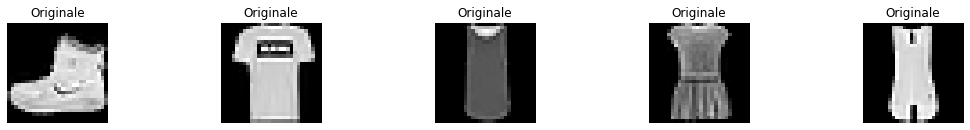

In [4]:
num_samples = 5 #for seplicity of 
#visualization select only the first 5 imagine of the dataset
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(3, num_samples, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title('Originale')
    plt.axis('off')
plt.tight_layout()
plt.show()


# Frobenius  norm

The **Frobenius Norm**, also known as the Euclidean norm or the L2 norm of a matrix A, measures the magnitude of the matrix. For a square matrix A of size n x n with real or complex elements, the Frobenius norm is defined as the square root of the sum of the squares of all the matrix elements:

$$Frobenius Norm (A) = (\sum_{i=1}^{n}\sum_{j=1}^{n}|a_{ij}|^2)^\frac{1}{2}$$

Where |a_ij| represents the absolute value of the element in row i and column j of matrix A. This norm is widely used in mathematical, scientific, and engineering applications to quantify the difference between matrices or to assess errors in numerical methods. In the context of image processing, for example, the Frobenius norm can be used to measure the error between two images represented as matrices, such as in singular value decomposition (SVD) or principal component analysis (PCA).



# PCA 

The code below is carrying out PCA on different versions of the training images using varying numbers of principal components. In each iteration, it calculates the Frobenius Norm between the original images and the images reconstructed through PCA, while also keeping track of the time taken for the entire process. These outcomes will be utilized to assess the impact of dimensionality reduction on image quality and execution time.

In [5]:
# Compute the error for different number of principal component 
num_components_range = range(98, 111)  # Range of principal component 
err_pca = []
time_pca = []

for num_components in num_components_range:
    #  PCA
    pca = PCA(n_components=num_components)
    
    start_time_pca = time.time()
    train_images_pca = pca.fit_transform(train_images_scaled)
    
    #Reconstruct the images from 
    #their principal components using inverse transformation
    reconstructed_images_pca = \
    pca.inverse_transform(train_images_pca).reshape\
    (train_images.shape[0], 28, 28)
    end_time_pca = time.time()
    elapsed_time_pca = end_time_pca - start_time_pca
    
    
    #compute th error
    err_pca.append\
    (np.linalg.norm((train_images_flat - \
                     reconstructed_images_pca.reshape(-1, 28*28)) ** 2))
    time_pca.append(elapsed_time_pca)

# SVD

Given A $\in\mathbb{R}^{mxn}$  there exist three matrices U $\in \mathbb{R}^{mxm}$,   $\in\mathbb{R}^{nxn}$ and $\Sigma$ $\in\mathbb{R}^{mxn}$ such that: $$A = U \Sigma V^T$$

and:

- U,V are unitary and thei columns are called resplectivetly **left-singular vectors** of A and **right-singular vectors** of A.
- $\Sigma$ has non-null and negative values $\sigma_i$ only on the diagonal, that are called **singular values of A**


The code below is performing Singular Value Decomposition (SVD) on various versions of the training images using different numbers of principal components. For each execution, it calculates the  Frobenius Norm between between the original images and the images reconstructed through SVD, while also keeping track of the elapsed time for the entire process. These outcomes will be utilized to evaluate how dimensionality reduction impacts image quality and execution time.

In [6]:
err_svd = []
time_svd = []
for num_components in num_components_range:
    
    #  SVD
    U, S, Vt = np.linalg.svd(train_images_scaled, full_matrices=False)
    
    start_time_svd = time.time()
    #Reconstruct the images from 
    #their principal components using inverse transformation
    reconstructed_images_svd = np.dot(U[:, :num_components],\
                        np.dot(np.diag(S[:num_components]),\
                        Vt[:num_components, :])).reshape(train_images.shape[0], 28, 28)
    end_time_svd = time.time()
    elapsed_time_svd = end_time_svd - start_time_svd
    
    
     #compute th error
    err_svd.append(np.linalg.norm(\
                (train_images_flat - reconstructed_images_svd.reshape(-1, 28*28)) ** 2))
    time_svd.append(elapsed_time_svd)

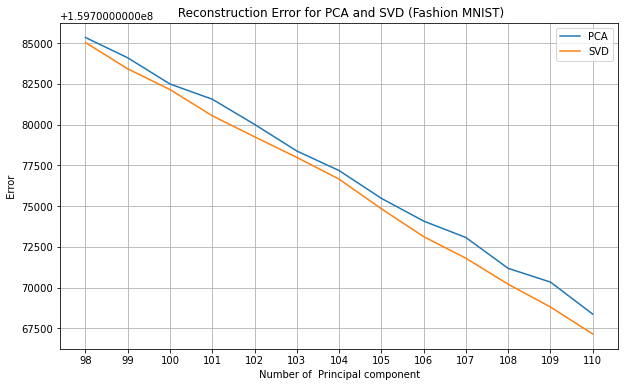

In [7]:
# plot the graph error 
plt.figure(figsize=(10, 6))
plt.plot(num_components_range, err_pca, label='PCA')
plt.plot(num_components_range, err_svd, label='SVD')
plt.xlabel('Number of  Principal component')
plt.ylabel(' Error ')
plt.xticks(ticks=num_components_range)
plt.title(' Reconstruction Error for PCA and SVD (Fashion MNIST)')
plt.legend()
plt.grid()
plt.show()

By increasing the number of principal components used in techniques like PCA (Principal Component Analysis) or SVD (Singular Value Decomposition), the Frobenius Norm between tends to decrease. This is due to the fact that a higher number of principal components contains more detailed information about the original data, allowing for a better approximation of the data's underlying structure.

The Frobenius Norm between graph for PCA (Principal Component Analysis) is higher compared to that for SVD (Singular Value Decomposition), it means that the reconstruction error is generally greater when using PCA compared to SVD for the corresponding number of principal components.

In other words, the Frobenius Norm between represents how well the original images are approximated by the reconstructed images using the principal components. A higher value indicates a worse approximation or reconstruction of the images.

In the context of this analysis, it's worth noting that the optimal number of components appears to be 110.







In [8]:
pca_times = np.insert(np.cumsum(time_pca),0,0)
svd_times = np.insert(np.cumsum(time_svd),0,0)


time_p = pca_times[:len(num_components_range)]
time_s = svd_times[:len(num_components_range)]


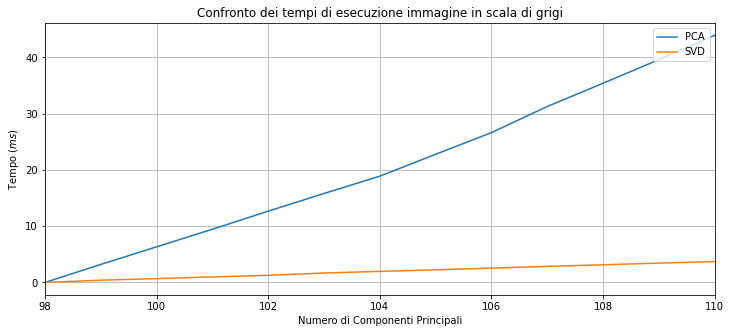

In [9]:
# plot the time error
plt.figure(figsize=(12, 5))
plt.margins(x=0)
plt.plot(num_components_range, time_p, label="PCA")
plt.plot(num_components_range, time_s, label="SVD")
plt.title('Confronto dei tempi di esecuzione immagine in scala di grigi')
plt.legend(loc="upper right")
plt.ylabel('Tempo ($ms$)')
plt.xlabel('Numero di Componenti Principali')
plt.grid()
plt.show()

In the comparison time graph, if the timeline of PCA (Principal Component Analysis) is above that of SVD (Singular Value Decomposition), it means that generally PCA requires more execution time compared to SVD for the corresponding number of principal components.

This might indicate that the implementation or algorithm used to perform PCA is more complex or demands more computational resources than the one used for SVD, at least in the specific context of this comparison.

# Application of PCA and SVD with the best number of components

In [10]:
# PCA
num_components_pca = 110 # Number of principal components 
pca = PCA(n_components=num_components_pca)
train_images_pca = pca.fit_transform(train_images_scaled)

reconstructed_images_pca = pca.inverse_transform\
(train_images_pca).reshape(train_images.shape[0], 28, 28)
# SVD
U, S, Vt = np.linalg.svd(train_images_scaled, full_matrices=False)
num_components_svd = 110  # NUmber of principal components 
reconstructed_images_svd = np.dot\
(U[:, :num_components_svd], np.dot\
 (np.diag(S[:num_components_svd]), \
  Vt[:num_components_svd, :])).reshape(train_images.shape[0], 28, 28)

# Compute the error
err_pca = np.linalg.norm(\
        ((train_images_flat - reconstructed_images_pca.reshape(-1, 28*28)) ** 2))
err_svd = np.linalg.norm(\
        ((train_images_flat - reconstructed_images_svd.reshape(-1, 28*28)) ** 2))

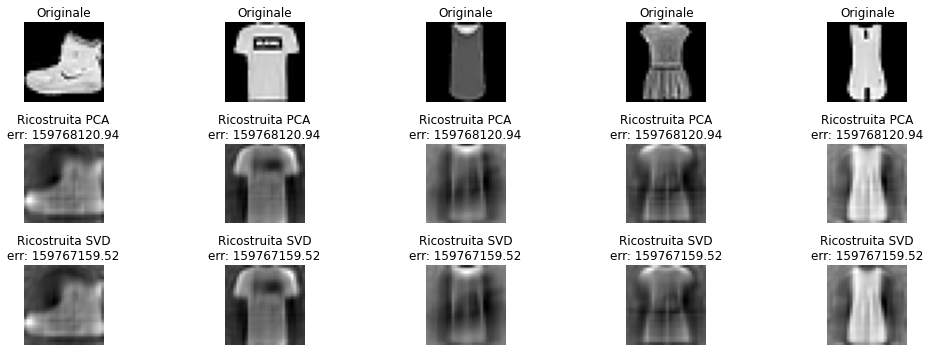

In [11]:
# Original imagine, imagine recostructed using PCA e SVD 
num_samples = 5 #for seplicity of visualization select only
#the first 5 imagine of the dataset
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(3, num_samples, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title('Originale')
    plt.axis('off')
    
    plt.subplot(3, num_samples, i + num_samples + 1)
    plt.imshow(reconstructed_images_pca[i], cmap='gray')
    plt.title(f'Ricostruita PCA\nerr: {err_pca:.2f}')
    plt.axis('off')

    plt.subplot(3, num_samples, i + 2*num_samples + 1)
    plt.imshow(reconstructed_images_svd[i], cmap='gray')
    plt.title(f'Ricostruita SVD\nerr: {err_svd:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In conclusion, from the analysis on the Fashion MNIST dataset, it's clear that Singular Value Decomposition (SVD) performs better than Principal Component Analysis (PCA)  in terms of performance. Regarding computation time, SVD requires less computing power and also produces slightly better reconstruction results using the same number of principal components.

This suggests that SVD might be a more efficient and effective choice for dimensionality reduction when dealing with the Fashion MNIST dataset.

However, it's important to consider that the choice between SVD and PCA can also depend on other factors such as the specific objectives of the analysis and the trade-offs between time, accuracy, and interpretability.